In [70]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
from string import punctuation
import warnings
warnings.filterwarnings("ignore")

In [71]:
data= pd.read_csv(r'https://raw.githubusercontent.com/akramshaik2326/Dataset/master/Tweets60k.csv')
print(data.shape)
data.head()

In [73]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [74]:
from nltk.corpus import wordnet

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
words = set(nltk.corpus.words.words())

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    #print('stopfree: ',stop_free)
    hash_free = re.sub(r"#\S+", "", stop_free)
    mention_free = re.sub(r"@\S+", "", hash_free)
    num_free = re.sub(r"\d+","",mention_free)
    RT_free = re.sub('RT[\s]+', '', num_free)
    #print('number free: ', num_free)
    link_free = re.sub(r"https\S+", "", RT_free)
    punc_free = ''.join(ch for ch in link_free if ch not in exclude)
    otherlang_free = ''.join(ch for ch in punc_free if ch in words or ch == ' ')
    #print('punc: ',punc_free)
    #print('other: ',otherlang_free)
    normalized = " ".join(lemma.lemmatize(word) for word in otherlang_free.split())
    #print('normalized: ',normalized)
    len_free = ''.join(word for word in otherlang_free if len(word)>=1 )
    #print('len free:',len_free)
    len_free1 = len_free.split()
    #print(len_free1)
    lang_free = ' '.join(word for word in len_free1 if wordnet.synsets(word))
    #print(lang_free)
    y = lang_free.split()
    filtered=[]
    for i in y:
        if len(i)>2:
            filtered.append(i)
    return filtered

In [75]:
data.head()

,created_at,full_text
0,2020-01-29 07:04:45,RT @Fiddmeister: @MarkFriesen08 @CarGranny @Le...
1,2020-01-26 07:10:01,RT @JoceeeeCL: footage of a Wuhan doctor havin...
2,2020-01-28 06:06:08,RT @wawasanU10: CORONAVIRUS: HOW TO PROTECT YO...
3,2020-01-29 21:44:12,RT @SavinTheBees: When I open twitter and see ...
4,2020-01-29 03:27:13,RT @Naturezlife: คนงานในโรงงานกำลังเร่งผลิตยาฆ...


In [76]:
data['Tweets'] = data['full_text'].apply(clean)
data.head(10)
#sample=pd.DataFrame(data.head(30000))
#sample.drop(['text_as_string'], axis=1)
#sample['text_as_string'] = sample['Tweets'].str.join(" ")

,created_at,full_text,Tweets
0,2020-01-29 07:04:45,RT @Fiddmeister: @MarkFriesen08 @CarGranny @Le...,"[extremely, problematic]"
1,2020-01-26 07:10:01,RT @JoceeeeCL: footage of a Wuhan doctor havin...,"[footage, wuhan, doctor, mental, breakdown]"
2,2020-01-28 06:06:08,RT @wawasanU10: CORONAVIRUS: HOW TO PROTECT YO...,"[protect, infection, observe, good, personal, ..."
3,2020-01-29 21:44:12,RT @SavinTheBees: When I open twitter and see ...,"[open, twitter, see, around, lives]"
4,2020-01-29 03:27:13,RT @Naturezlife: คนงานในโรงงานกำลังเร่งผลิตยาฆ...,[]
5,2020-01-26 17:36:06,RT @TheWestBlock: While there are similarities...,"[similarities, sars, new, experts, say, global..."
6,2020-01-30 19:48:29,RT @QsentMeToo: These leaks were classified in...,"[leaks, classified, info, sentence, things, da..."
7,2020-01-25 19:14:00,"SM should prioritize their health and safety, ...","[prioritize, health, safety, boys, also, staff..."
8,2020-01-26 18:21:15,@DrJRMarcelin Any word on effectiveness/safety...,"[word, ace, inhibitors, preventative]"
9,2020-01-28 09:43:45,RT @CNN: How to protect yourself from Wuhan co...,"[protect, wuhan, avoid, close, contact, showin..."


In [77]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
data["sentiments"] = data['Tweets'].str.join(" ").apply(lambda x: sid.polarity_scores(x))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [78]:
data.head(10)

,created_at,full_text,Tweets,sentiments
0,2020-01-29 07:04:45,RT @Fiddmeister: @MarkFriesen08 @CarGranny @Le...,"[extremely, problematic]","{'neg': 0.762, 'neu': 0.238, 'pos': 0.0, 'comp..."
1,2020-01-26 07:10:01,RT @JoceeeeCL: footage of a Wuhan doctor havin...,"[footage, wuhan, doctor, mental, breakdown]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2020-01-28 06:06:08,RT @wawasanU10: CORONAVIRUS: HOW TO PROTECT YO...,"[protect, infection, observe, good, personal, ...","{'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'comp..."
3,2020-01-29 21:44:12,RT @SavinTheBees: When I open twitter and see ...,"[open, twitter, see, around, lives]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2020-01-29 03:27:13,RT @Naturezlife: คนงานในโรงงานกำลังเร่งผลิตยาฆ...,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
5,2020-01-26 17:36:06,RT @TheWestBlock: While there are similarities...,"[similarities, sars, new, experts, say, global...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,2020-01-30 19:48:29,RT @QsentMeToo: These leaks were classified in...,"[leaks, classified, info, sentence, things, da...","{'neg': 0.248, 'neu': 0.465, 'pos': 0.287, 'co..."
7,2020-01-25 19:14:00,"SM should prioritize their health and safety, ...","[prioritize, health, safety, boys, also, staff...","{'neg': 0.199, 'neu': 0.34, 'pos': 0.461, 'com..."
8,2020-01-26 18:21:15,@DrJRMarcelin Any word on effectiveness/safety...,"[word, ace, inhibitors, preventative]","{'neg': 0.4, 'neu': 0.6, 'pos': 0.0, 'compound..."
9,2020-01-28 09:43:45,RT @CNN: How to protect yourself from Wuhan co...,"[protect, wuhan, avoid, close, contact, showin...","{'neg': 0.338, 'neu': 0.483, 'pos': 0.179, 'co..."


In [79]:
data = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)

In [80]:
data.head(10)

,created_at,full_text,Tweets,neg,neu,pos,compound
0,2020-01-29 07:04:45,RT @Fiddmeister: @MarkFriesen08 @CarGranny @Le...,"[extremely, problematic]",0.762,0.238,0.000,-0.4927
1,2020-01-26 07:10:01,RT @JoceeeeCL: footage of a Wuhan doctor havin...,"[footage, wuhan, doctor, mental, breakdown]",0.000,1.000,0.000,0.0000
2,2020-01-28 06:06:08,RT @wawasanU10: CORONAVIRUS: HOW TO PROTECT YO...,"[protect, infection, observe, good, personal, ...",0.000,0.593,0.407,0.6705
3,2020-01-29 21:44:12,RT @SavinTheBees: When I open twitter and see ...,"[open, twitter, see, around, lives]",0.000,1.000,0.000,0.0000
4,2020-01-29 03:27:13,RT @Naturezlife: คนงานในโรงงานกำลังเร่งผลิตยาฆ...,[],0.000,0.000,0.000,0.0000
5,2020-01-26 17:36:06,RT @TheWestBlock: While there are similarities...,"[similarities, sars, new, experts, say, global...",0.000,1.000,0.000,0.0000
6,2020-01-30 19:48:29,RT @QsentMeToo: These leaks were classified in...,"[leaks, classified, info, sentence, things, da...",0.248,0.465,0.287,-0.1280
7,2020-01-25 19:14:00,"SM should prioritize their health and safety, ...","[prioritize, health, safety, boys, also, staff...",0.199,0.340,0.461,0.6597
8,2020-01-26 18:21:15,@DrJRMarcelin Any word on effectiveness/safety...,"[word, ace, inhibitors, preventative]",0.400,0.600,0.000,-0.2500
9,2020-01-28 09:43:45,RT @CNN: How to protect yourself from Wuhan co...,"[protect, wuhan, avoid, close, contact, showin...",0.338,0.483,0.179,-0.3182


In [83]:
empty_indexlist=list(data[data['Tweets'].str.len() < 1].index)
print(len(empty_indexlist))
data=data.drop(empty_indexlist)
data=data.reset_index(drop=True)
print(data.shape)
data.head(10)

0
(54161, 7)


,created_at,full_text,Tweets,neg,neu,pos,compound
0,2020-01-29 07:04:45,RT @Fiddmeister: @MarkFriesen08 @CarGranny @Le...,"[extremely, problematic]",0.762,0.238,0.000,-0.4927
1,2020-01-26 07:10:01,RT @JoceeeeCL: footage of a Wuhan doctor havin...,"[footage, wuhan, doctor, mental, breakdown]",0.000,1.000,0.000,0.0000
2,2020-01-28 06:06:08,RT @wawasanU10: CORONAVIRUS: HOW TO PROTECT YO...,"[protect, infection, observe, good, personal, ...",0.000,0.593,0.407,0.6705
3,2020-01-29 21:44:12,RT @SavinTheBees: When I open twitter and see ...,"[open, twitter, see, around, lives]",0.000,1.000,0.000,0.0000
4,2020-01-26 17:36:06,RT @TheWestBlock: While there are similarities...,"[similarities, sars, new, experts, say, global...",0.000,1.000,0.000,0.0000
5,2020-01-30 19:48:29,RT @QsentMeToo: These leaks were classified in...,"[leaks, classified, info, sentence, things, da...",0.248,0.465,0.287,-0.1280
6,2020-01-25 19:14:00,"SM should prioritize their health and safety, ...","[prioritize, health, safety, boys, also, staff...",0.199,0.340,0.461,0.6597
7,2020-01-26 18:21:15,@DrJRMarcelin Any word on effectiveness/safety...,"[word, ace, inhibitors, preventative]",0.400,0.600,0.000,-0.2500
8,2020-01-28 09:43:45,RT @CNN: How to protect yourself from Wuhan co...,"[protect, wuhan, avoid, close, contact, showin...",0.338,0.483,0.179,-0.3182
9,2020-01-24 13:02:51,"RT @Reuters: China races to build a new 1,000-...","[china, races, build, new, bed, hospital, cope...",0.000,1.000,0.000,0.0000


In [31]:
#pip install wordcould

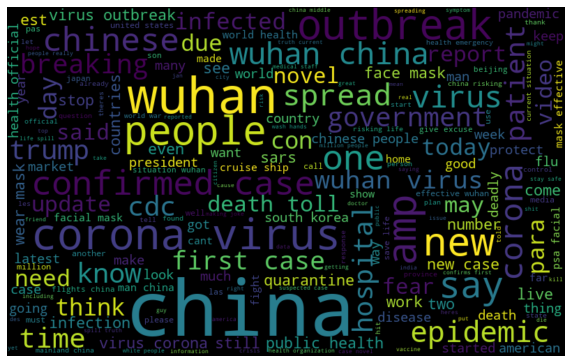

In [32]:
all_words = ' '.join([text for text in data['Tweets'].str.join(" ")])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


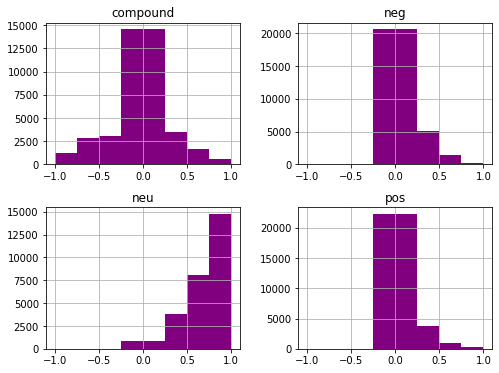

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
data.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],ax=ax,color="purple")

#plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [84]:
sentiment_df = pd.DataFrame(data, columns=["compound", "Tweets"])

sentiment_df.head()

,compound,Tweets
0,-0.4927,"[extremely, problematic]"
1,0.0000,"[footage, wuhan, doctor, mental, breakdown]"
2,0.6705,"[protect, infection, observe, good, personal, ..."
3,0.0000,"[open, twitter, see, around, lives]"
4,0.0000,"[similarities, sars, new, experts, say, global..."


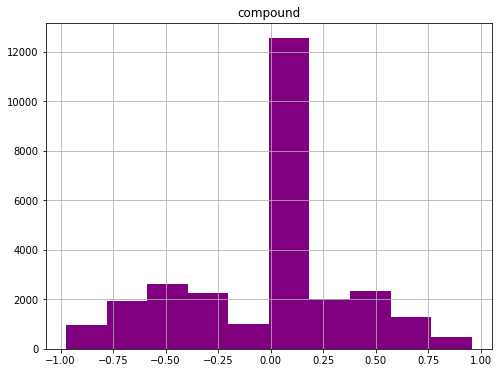

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df1.hist(ax=ax,color="purple")

#plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [86]:
def Analyze_score(score):
    if score < -0.5:
        return 'Negative'
    elif score > 0.5:
        return 'Positive'
    else:
        return 'Neutral'
data['Analysis'] = data['compound'].apply(Analyze_score)
data.head()

,created_at,full_text,Tweets,neg,neu,pos,compound,Analysis
0,2020-01-29 07:04:45,RT @Fiddmeister: @MarkFriesen08 @CarGranny @Le...,"[extremely, problematic]",0.762,0.238,0.000,-0.4927,Neutral
1,2020-01-26 07:10:01,RT @JoceeeeCL: footage of a Wuhan doctor havin...,"[footage, wuhan, doctor, mental, breakdown]",0.000,1.000,0.000,0.0000,Neutral
2,2020-01-28 06:06:08,RT @wawasanU10: CORONAVIRUS: HOW TO PROTECT YO...,"[protect, infection, observe, good, personal, ...",0.000,0.593,0.407,0.6705,Positive
3,2020-01-29 21:44:12,RT @SavinTheBees: When I open twitter and see ...,"[open, twitter, see, around, lives]",0.000,1.000,0.000,0.0000,Neutral
4,2020-01-26 17:36:06,RT @TheWestBlock: While there are similarities...,"[similarities, sars, new, experts, say, global...",0.000,1.000,0.000,0.0000,Neutral


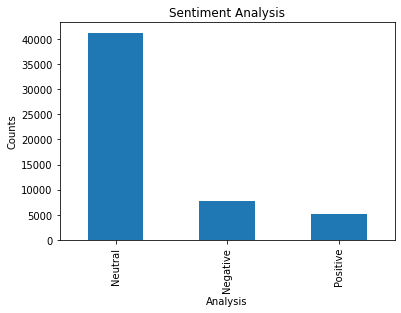

In [87]:
plt.title('Sentiment Analysis')
plt.xlabel('Analysis')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [88]:
data['created_at']= data['created_at'].astype('datetime64[ns]')
data['month']=pd.DatetimeIndex(data['created_at']).month
data.head()

,created_at,full_text,Tweets,neg,neu,pos,compound,Analysis,month
0,2020-01-29 07:04:45,RT @Fiddmeister: @MarkFriesen08 @CarGranny @Le...,"[extremely, problematic]",0.762,0.238,0.000,-0.4927,Neutral,1
1,2020-01-26 07:10:01,RT @JoceeeeCL: footage of a Wuhan doctor havin...,"[footage, wuhan, doctor, mental, breakdown]",0.000,1.000,0.000,0.0000,Neutral,1
2,2020-01-28 06:06:08,RT @wawasanU10: CORONAVIRUS: HOW TO PROTECT YO...,"[protect, infection, observe, good, personal, ...",0.000,0.593,0.407,0.6705,Positive,1
3,2020-01-29 21:44:12,RT @SavinTheBees: When I open twitter and see ...,"[open, twitter, see, around, lives]",0.000,1.000,0.000,0.0000,Neutral,1
4,2020-01-26 17:36:06,RT @TheWestBlock: While there are similarities...,"[similarities, sars, new, experts, say, global...",0.000,1.000,0.000,0.0000,Neutral,1


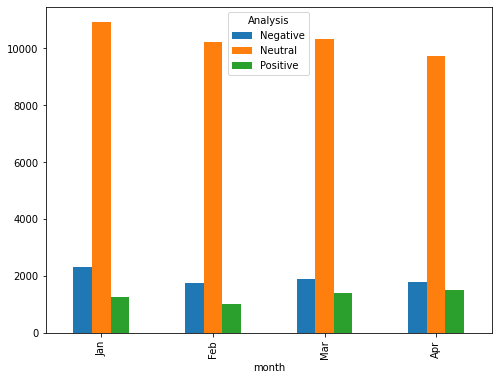

In [92]:
fig, ax = plt.subplots(figsize=(8, 6))
tweet_sentiment = data.groupby(['month', 'Analysis']).Analysis.count().unstack()
tweet_sentiment.plot(kind='bar',ax=ax)
ax.set_xticklabels(['Jan','Feb','Mar','Apr'])
plt.show()


In [98]:
data.shape

(54161, 9)